# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Hanna Anenia 

### GitHub Repo: https://github.com/hanenia/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [3]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list


Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     4.2.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.0
deck                      3.0.0
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm 

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [7]:
import requests

# URL of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    
    # Save the HTML content to a file
    with open("article.html", "w", encoding="utf-8") as f:
        f.write(html_content)
        
    print("Article HTML content has been saved to 'article.html'")
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Article HTML content has been saved to 'article.html'


In [9]:
from bs4 import BeautifulSoup

# Read the HTML content from the saved file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse HTML and extract plain text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Save plain text to a new file
with open('article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)

print("Article content has been saved to 'article.txt'")

Article content has been saved to 'article.txt'


In [11]:
import requests
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"

response = requests.get("https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college")

print(response.status_code)
print(response.headers['content-type'])

200
text/html; charset=UTF-8


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [26]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import nltk

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(article_text)
    
    # Perform sentiment analysis on the article text
    blob = TextBlob(article_text)
    polarity_score = blob.sentiment.polarity
    
    # Print the polarity score with an appropriate label
    print("Polarity Score:", polarity_score)
    
    # Print the number of sentences in the original article with an appropriate label
    print("Number of Sentences:", len(sentences))
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Polarity Score: 0.05557618402979231
Number of Sentences: 1118


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)3. 

In [29]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Filter out stop words and punctuation, and convert tokens to lower case
    filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    # Count the frequency of each token
    token_freq = Counter(filtered_tokens)
    
    # Get the 5 most frequent tokens
    common_tokens = token_freq.most_common(5)
    
    # Print the common tokens with an appropriate label
    print("Most frequent 5 tokens:")
    for token, frequency in common_tokens:
        print(token)
    
    # Print the tokens and their frequencies with appropriate labels
    print("\nToken Frequencies:")
    for token, frequency in token_freq.items():
        print(f"{token}: {frequency}")
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)


Most frequent 5 tokens:
 
alcohol


college
students

Token Frequencies:















: 1
burden: 4
alcohol: 322
use: 62
excessive: 26
consumption: 40
related: 63
consequences: 54
college: 259
students: 201
|: 1
research: 42
current: 4
reviews: 5







  : 1
skip: 1
main: 1
content: 1












: 1
official: 5
website: 3
united: 8
states: 9
government: 4

: 269
know: 10



: 11










: 2
.gov: 2
means: 6


              : 2
federal: 3
websites: 1
end: 1
.mil: 1
sharing: 1
sensitive: 2
information: 8
sure: 1
site: 3

            






: 1
secure: 1
https://: 1
ensures: 1
connecting: 1
provide: 1
encrypted: 1
transmitted: 1
securely: 1

            


















: 1
menu: 1







: 3
open: 1
access: 2






: 3
openaccess: 1









: 2
search: 4
buttonsearch: 2














 : 1
home: 2





: 9
articles: 2




 : 8
volume: 11
archive: 2






 : 1
news: 2
notes: 2
authors: 3
reviewers: 2
arcr: 3
editorial: 2
staff: 1
advisory: 3
board: 1
licensing: 1
publishing: 2





4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [32]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Filter out stop words and punctuation, and extract lemmas
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    # Count the frequency of each lemma
    lemma_freq = Counter(lemmas)
    
    # Get the 5 most frequent lemmas
    common_lemmas = lemma_freq.most_common(5)
    
    # Print the common lemmas with an appropriate label
    print("Most frequent 5 lemmas:")
    for lemma, frequency in common_lemmas:
        print(lemma)
    
    # Print the lemmas and their frequencies with appropriate labels
    print("\nLemmas and their frequencies:")
    for lemma, frequency in lemma_freq.items():
        print(f"{lemma}: {frequency}")
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)
    
  
    

Most frequent 5 lemmas:
 
alcohol


college
student

Lemmas and their frequencies:















: 1
burden: 4
alcohol: 322
use: 64
excessive: 26
consumption: 40
related: 10
consequences: 5
college: 268
students: 9
|: 1
research: 42
current: 4
reviews: 3







  : 1
skip: 2
main: 1
content: 1












: 1
official: 5
website: 4
united: 8
states: 8
government: 4

: 269
know: 14



: 11










: 2
.gov: 2
mean: 7


              : 2
federal: 3
end: 1
.mil: 1
share: 2
sensitive: 2
information: 8
sure: 1
site: 3

            






: 1
secure: 1
https://: 1
ensure: 1
connect: 1
provide: 4
encrypt: 1
transmit: 1
securely: 1

            


















: 1
menu: 1







: 3
open: 1
access: 3






: 3
openaccess: 1









: 2
search: 4
buttonsearch: 2














 : 1
home: 2





: 9
articles: 2




 : 8
volume: 13
archive: 4






 : 1
news: 2
notes: 2
authors: 2
reviewer: 2
arcr: 3
editorial: 2
staff: 1
advisory: 3
board: 1
licensing: 1
publishing: 2























5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

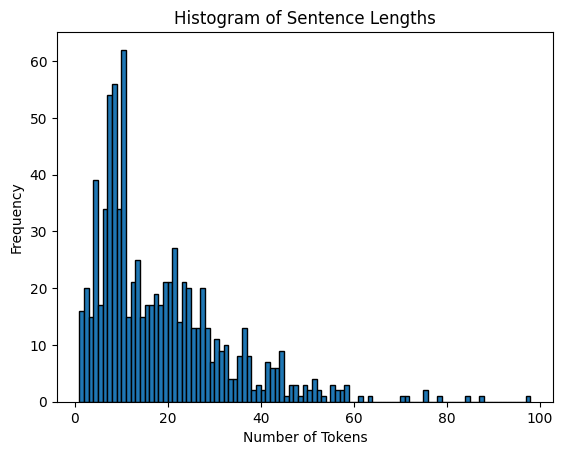

In [34]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Tokenize the text into sentences
    sentences = [sent.text for sent in doc.sents]
    
    # Score each sentence based on the number of tokens
    scores = [len(sent.split()) for sent in sentences]
    
    # Plot a histogram of the scores
    plt.hist(scores, bins=range(min(scores), max(scores) + 1), edgecolor='black')
    plt.title('Histogram of Sentence Lengths')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.show()
    
    # Most common range of scores: 10-20 tokens per sentence
    # This is based on visual inspection of the histogram
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

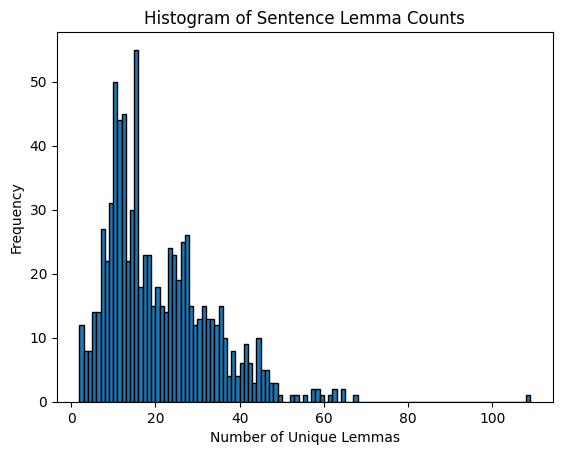

In [35]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Tokenize the text into sentences
    sentences = [sent.text for sent in doc.sents]
    
    # Lemmatize each sentence and score based on the number of lemmas
    lemma_scores = [len(set(token.lemma_ for token in nlp(sent))) for sent in sentences]
    
    # Plot a histogram of the scores
    plt.hist(lemma_scores, bins=range(min(lemma_scores), max(lemma_scores) + 1), edgecolor='black')
    plt.title('Histogram of Sentence Lemma Counts')
    plt.xlabel('Number of Unique Lemmas')
    plt.ylabel('Frequency')
    plt.show()
    
    # Most common range of scores: 15-25 unique lemmas per sentence
    # This is based on visual inspection of the histogram
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [36]:
import requests
from bs4 import BeautifulSoup
import spacy

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Tokenize the text into sentences
    sentences = [sent for sent in doc.sents]
    
    # Define the cutoff score (based on the histogram analysis)
    cutoff_score = 20
    
    # Initialize an empty list to store sentences in the summary
    summary_sentences = []
    
    # Create a summary by selecting sentences with a score greater than the cutoff score
    for sent in sentences:
        if len(sent.text.split()) > cutoff_score:
            summary_sentences.append(sent.text.strip())
    
    # Generate the summary text by joining the sentences in the list
    summary_text = ' '.join(summary_sentences)
    
    # Print the summary
    print(summary_text)
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

The Burden of Alcohol Use: Excessive Alcohol Consumption and Related Consequences Among College Students | Alcohol Research: Current Reviews






  Skip to main content











An official website of the United States government
Here's how you know The https:// ensures that you are connecting to the official website and that any information you provide is encrypted and transmitted securely. Menu






Open Access





OpenAccess








Search


Search ButtonSearch













 Home




Articles



 Current Volume



 Archive





 News and Notes



 Authors



 Reviewers




About



 About ARCR



 Editorial Staff



 Editorial Advisory Board



 Licensing and Publishing








Search


Search ButtonSearch





















          Volume
      35
              Issue
      2
      

December 1, 2013 The Burden of Alcohol Use: Excessive Alcohol Consumption and Related Consequences Among College Students




Part of the
	

    Topic Series: Alcohol’s Evolving Impact on Indiv

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [37]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Tokenize the text into sentences
    sentences = [sent for sent in doc.sents]
    
    # Define the cutoff score (based on the histogram analysis)
    cutoff_score = 20
    
    # Initialize an empty list to store sentences in the summary
    summary_sentences = []
    
    # Create a summary by selecting sentences with a score greater than the cutoff score
    for sent in sentences:
        if len(sent.text.split()) > cutoff_score:
            summary_sentences.append(sent.text.strip())
    
    # Generate the summary text by joining the sentences in the list
    summary_text = ' '.join(summary_sentences)
    
    # Calculate the polarity score of the summary
    polarity_score = TextBlob(summary_text).sentiment.polarity
    
    # Count the number of sentences in the summarized article
    num_sentences = len(summary_sentences)
    
    # Print the polarity score of the summary with an appropriate label
    print("Polarity Score of the Summary:", polarity_score)
    
    # Print the number of sentences in the summarized article with an appropriate label
    print("Number of Sentences in the Summarized Article:", num_sentences)
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Polarity Score of the Summary: 0.06096093514170904
Number of Sentences in the Summarized Article: 290


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [38]:
import requests
from bs4 import BeautifulSoup
import spacy

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Tokenize the text into sentences
    sentences = [sent for sent in doc.sents]
    
    # Define the cutoff score (based on the histogram analysis)
    cutoff_score = 15
    
    # Initialize an empty list to store sentences in the summary
    summary_sentences = []
    
    # Create a summary by selecting sentences with a score greater than the cutoff score
    for sent in sentences:
        lemma_count = len(set(token.lemma_ for token in nlp(sent.text)))
        if lemma_count > cutoff_score:
            summary_sentences.append(sent.text.strip())
    
    # Generate the summary text by joining the sentences in the list
    summary_text = ' '.join(summary_sentences)
    
    # Print the summary
    print(summary_text)
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

The Burden of Alcohol Use: Excessive Alcohol Consumption and Related Consequences Among College Students | Alcohol Research: Current Reviews






  Skip to main content











An official website of the United States government
Here's how you know Before sharing sensitive information, make sure you’re on a federal government site. The https:// ensures that you are connecting to the official website and that any information you provide is encrypted and transmitted securely. Menu






Open Access





OpenAccess








Search


Search ButtonSearch













 Home




Articles



 Current Volume



 Archive





 News and Notes



 Authors



 Reviewers




About



 About ARCR



 Editorial Staff



 Editorial Advisory Board



 Licensing and Publishing








Search


Search ButtonSearch





















          Volume
      35
              Issue
      2
      

December 1, 2013 The Burden of Alcohol Use: Excessive Alcohol Consumption and Related Consequences Among Col

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [41]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# Download the HTML content of the article
url = "https://arcr.niaaa.nih.gov/volume/35/2/burden-alcohol-use-excessive-alcohol-consumption-and-related-consequences-among-college"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the text content from the HTML article
    article_text = soup.get_text()
    
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text using the spaCy pipeline
    doc = nlp(article_text)
    
    # Tokenize the text into sentences
    sentences = [sent for sent in doc.sents]
    
    # Define the cutoff score (based on the histogram analysis)
    cutoff_score = 15
    
    # Initialize an empty list to store sentences in the summary
    summary_sentences = []
    
    # Create a summary by selecting sentences with a score greater than the cutoff score
    for sent in sentences:
        lemma_count = len(set(token.lemma_ for token in nlp(sent.text)))
        if lemma_count > cutoff_score:
            summary_sentences.append(sent.text.strip())
    
    # Generate the summary text by joining the sentences in the list
    summary_text = ' '.join(summary_sentences)
    
    # Calculate the polarity score of the summary
    polarity_score = TextBlob(summary_text).sentiment.polarity
    
    # Count the number of sentences in the summarized article
    num_sentences = len(summary_sentences)
    
    # Print the polarity score of the summary with an appropriate label
    print("Polarity Score of the Summary:", polarity_score)
    
    # Print the number of sentences in the summarized article with an appropriate label
    print("Number of Sentences in the Summarized Article:", num_sentences)
    
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Polarity Score of the Summary: 0.05478895742422797
Number of Sentences in the Summarized Article: 443


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There is no mcuh difference with the poloarity score, the polariity score of the summary is almost zero. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think the polarity score and what I read about the ariticle indicate the same idea that drinking alcohole afffect performace. 